In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_kotlin(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="kotlin",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/kotlin_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (KOTLIN, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (KOTLIN, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_kotlin(save_directory="./", split="train")

train-00000-of-00006.parquet:   0%|          | 0.00/375M [00:00<?, ?B/s]

train-00001-of-00006.parquet:   0%|          | 0.00/375M [00:00<?, ?B/s]

train-00002-of-00006.parquet:   0%|          | 0.00/373M [00:00<?, ?B/s]

train-00003-of-00006.parquet:   0%|          | 0.00/373M [00:00<?, ?B/s]

train-00004-of-00006.parquet:   0%|          | 0.00/374M [00:00<?, ?B/s]

train-00005-of-00006.parquet:   0%|          | 0.00/373M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Saving the dataset (0/13 shards):   0%|          | 0/2239354 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (KOTLIN, train) successfully downloaded and saved to './/kotlin_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./kotlin_train_dataset")

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 2239354
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'src/main/kotlin/com/headlessideas/http/util/UtilityFunction.kt', 'max_stars_repo_name': 'Nandi/http', 'max_stars_count': 0, 'id': '0', 'content': '<gh_stars>0\npackage com.headlessideas.http.util\n\nimport com.headlessideas.http.Header\nimport java.nio.file.Files\nimport java.nio.file.Path\n\nval Path.contentTypeHeader: Header\n    get() = getContentType(this)\n\nprivate fun getContentType(path: Path) = when (path.extension) {\n    "html", "htm" -> html\n    "css" -> css\n    "csv" -> csv\n    "png" -> png\n    "jpg", "jpeg" -> jpeg\n    "gif" -> gif\n    "js" -> js\n    "json" -> json\n    "svg" -> svg\n    else -> plain\n}\n\nfun Path.exists(): Boolean = Files.exists(this)\nfun Path.readable(): Boolean = Files.isReadable(this)\nval Path.extension: String\n    get() = toFile().extension'}


In [7]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
<gh_stars>0
package com.headlessideas.http.util

import com.headlessideas.http.Header
import java.nio.file.Files
import java.nio.file.Path

val Path.contentTypeHeader: Header
    get() = getContentType(this)

private fun getContentType(path: Path) = when (path.extension) {
    "html", "htm" -> html
    "css" -> css
    "csv" -> csv
    "png" -> png
    "jpg", "jpeg" -> jpeg
    "gif" -> gif
    "js" -> js
    "json" -> json
    "svg" -> svg
    else -> plain
}

fun Path.exists(): Boolean = Files.exists(this)
fun Path.readable(): Boolean = Files.isReadable(this)
val Path.extension: String
    get() = toFile().extension


Example 1:
<gh_stars>0
package com.rawa.notes.ui.feature.detail

import com.rawa.notes.domain.Note

interface DetailView {
    fun noteId(): Long
}

data class DetailViewState(
    val note: Note? = null
)



Example 2:
package com.enxy.domain.features.settings.model

import androidx.annotation.Keep
import androidx.appcompat.app.AppCompatDelegate

data class 

In [8]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/2239354 [00:00<?, ? examples/s]

Example 0:
<gh_stars>0
package com.headlessideas.http.util

import com.headlessideas.http.Header
import java.nio.file.Files
import java.nio.file.Path

val Path.contentTypeHeader: Header
    get() = getContentType(this)

private fun getContentType(path: Path) = when (path.extension) {
    "html", "htm" -> html
    "css" -> css
    "csv" -> csv
    "png" -> png
    "jpg", "jpeg" -> jpeg
    "gif" -> gif
    "js" -> js
    "json" -> json
    "svg" -> svg
    else -> plain
}

fun Path.exists(): Boolean = Files.exists(this)
fun Path.readable(): Boolean = Files.isReadable(this)
val Path.extension: String
    get() = toFile().extension
Average Line Length: 22.185185185185187

Example 1:
<gh_stars>0
package com.rawa.notes.ui.feature.detail

import com.rawa.notes.domain.Note

interface DetailView {
    fun noteId(): Long
}

data class DetailViewState(
    val note: Note? = null
)

Average Line Length: 14.076923076923077

Example 2:
package com.enxy.domain.features.settings.model

import android

In [42]:
import pandas as pd

df = pd.DataFrame(dataset)

In [43]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    2.239354e+06
mean     3.087103e+01
std      8.328076e+00
min      1.608696e+00
25%      2.545872e+01
50%      3.086364e+01
75%      3.589062e+01
max      1.235000e+02
Name: avg_line_length, dtype: float64


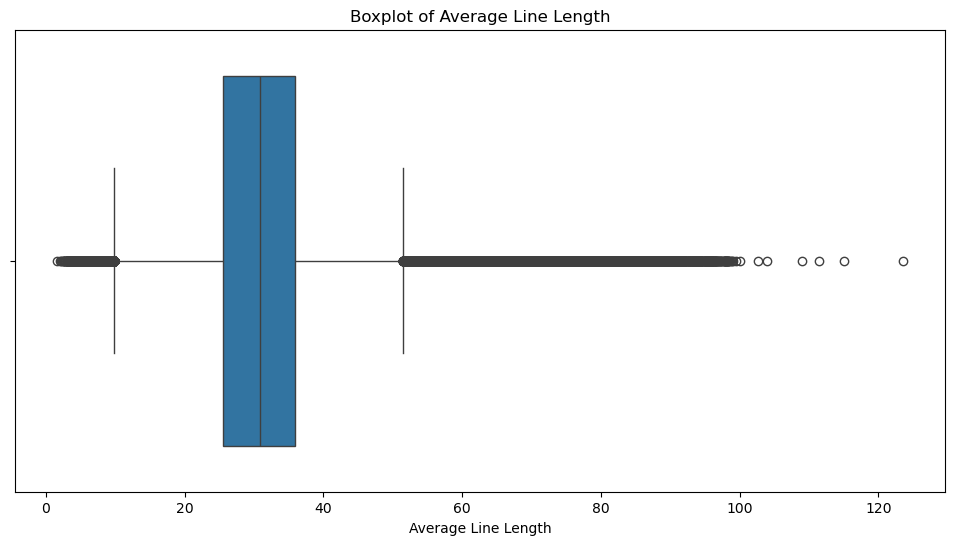

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [45]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1


In [46]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 33925


In [47]:
outliers['avg_line_length'].describe()

count    33925.000000
mean        50.201524
std         20.237099
min          1.608696
25%         52.153846
50%         54.722222
75%         59.647059
max        123.500000
Name: avg_line_length, dtype: float64

In [48]:
df.drop(outliers.index, inplace=True)

In [49]:
df['avg_line_length'].describe()

count    2.205429e+06
mean     3.057368e+01
std      7.634644e+00
min      9.811966e+00
25%      2.542857e+01
50%      3.076786e+01
75%      3.568056e+01
max      5.153846e+01
Name: avg_line_length, dtype: float64

In [50]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

36.908496732026144

In [51]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    2.205429e+06
mean     7.245221e+01
std      1.470800e+02
min      1.000000e+00
25%      1.900000e+01
50%      4.000000e+01
75%      8.200000e+01
max      4.898100e+04
Name: line_count, dtype: float64

In [52]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [53]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 1779378
Number of examples with line count in range 101-200: 281648
Number of examples with line count in range 201-300: 77309
Number of examples with line count in range 301-400: 30290
Number of examples with line count in range 401-500: 14170
Number of examples with line count in range 501-600: 7800
Number of examples with line count in range 601-700: 4367
Number of examples with line count in range 701-800: 2690
Number of examples with line count in range 801-900: 1821
Number of examples with line count in range 901-1000: 1298
Number of examples with line count in range 1000+: 4658


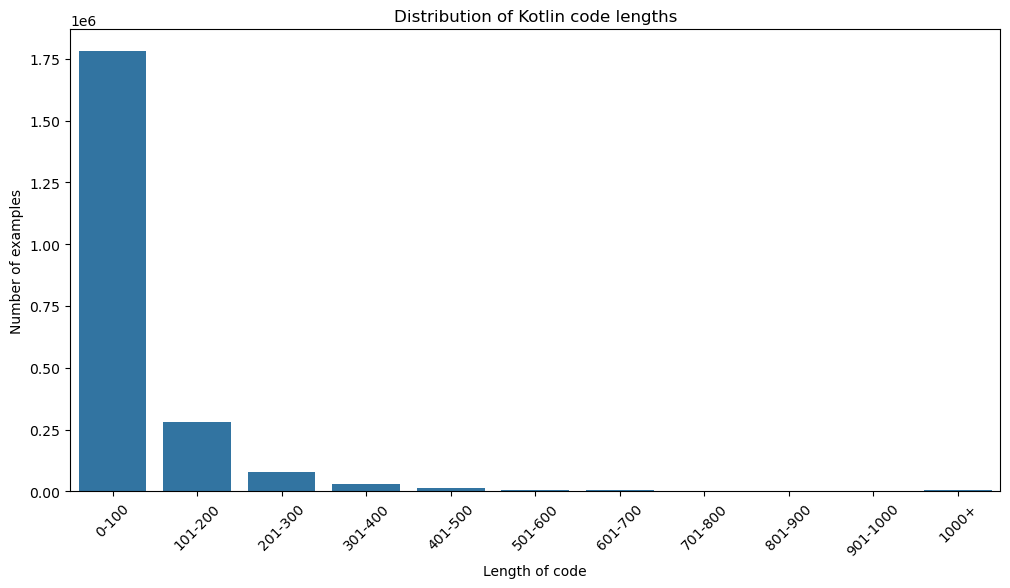

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of Kotlin code lengths")
plt.xlabel("Length of code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [55]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,1779378,1779378,80.681718,80.681718
1,101-200,281648,2061026,12.770667,93.452385
2,201-300,77309,2138335,3.505395,96.957780
3,301-400,30290,2168625,1.373429,98.331209
4,401-500,14170,2182795,0.642505,98.973714
5,501-600,7800,2190595,0.353673,99.327387
6,601-700,4367,2194962,0.198011,99.525398
7,701-800,2690,2197652,0.121972,99.647370
8,801-900,1821,2199473,0.082569,99.729939
9,901-1000,1298,2200771,0.058855,99.788794


In [56]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [57]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,<gh_stars>0\npackage com.headlessideas.http.ut...,22.185185,27
1,<gh_stars>0\npackage com.rawa.notes.ui.feature...,14.076923,13
2,package com.enxy.domain.features.settings.mode...,22.600000,45
3,package dev.kord.rest.json.request\n\nimport d...,32.154545,110
4,package pl.polciuta.qrscanner.utils\n\nimport ...,24.552632,38


In [58]:
df_filtered.shape

(2205429, 3)

In [59]:
df_filtered = df_filtered[df_filtered['line_count'] <= 150]
df_filtered.shape

(1970594, 3)

In [60]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 37]
df_filtered.shape

(1626225, 3)

In [61]:
df_filtered.head()

,content,avg_line_length,line_count
0,<gh_stars>0\npackage com.headlessideas.http.ut...,22.185185,27
1,<gh_stars>0\npackage com.rawa.notes.ui.feature...,14.076923,13
2,package com.enxy.domain.features.settings.mode...,22.600000,45
3,package dev.kord.rest.json.request\n\nimport d...,32.154545,110
4,package pl.polciuta.qrscanner.utils\n\nimport ...,24.552632,38


In [62]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     2.205429e+06  2.205429e+06
mean      3.057368e+01  7.245221e+01
std       7.634644e+00  1.470800e+02
min       9.811966e+00  1.000000e+00
25%       2.542857e+01  1.900000e+01
50%       3.076786e+01  4.000000e+01
75%       3.568056e+01  8.200000e+01
max       5.153846e+01  4.898100e+04

       avg_line_length    line_count
count     1.626225e+06  1.626225e+06
mean      2.763961e+01  4.206572e+01
std       5.927609e+00  3.377110e+01
min       9.812500e+00  1.000000e+00
25%       2.365217e+01  1.600000e+01
50%       2.846429e+01  3.100000e+01
75%       3.237500e+01  5.900000e+01
max       3.700000e+01  1.500000e+02


In [63]:
data_dict_kotlin = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_kotlin[f"kotlin_{i}"] = example

In [64]:
assert len(data_dict_kotlin) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [65]:
for i, (k,v) in enumerate(data_dict_kotlin.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example kotlin_0:
<gh_stars>0
package com.headlessideas.http.util

import com.headlessideas.http.Header
import java.nio.file.Files
import java.nio.file.Path

val Path.contentTypeHeader: Header
    get() = getContentType(this)

private fun getContentType(path: Path) = when (path.extension) {
    "html", "htm" -> html
    "css" -> css
    "csv" -> csv
    "png" -> png
    "jpg", "jpeg" -> jpeg
    "gif" -> gif
    "js" -> js
    "json" -> json
    "svg" -> svg
    else -> plain
}

fun Path.exists(): Boolean = Files.exists(this)
fun Path.readable(): Boolean = Files.isReadable(this)
val Path.extension: String
    get() = toFile().extension


Example kotlin_1:
<gh_stars>0
package com.rawa.notes.ui.feature.detail

import com.rawa.notes.domain.Note

interface DetailView {
    fun noteId(): Long
}

data class DetailViewState(
    val note: Note? = null
)



Example kotlin_2:
package com.enxy.domain.features.settings.model

import androidx.annotation.Keep
import androidx.appcompat.app.AppCompat

In [66]:
import json

with open('kotlin_train.json', 'w') as f:
    json.dump(data_dict_kotlin, f)
    print("Saved to 'kotlin_train.json'")

Saved to 'kotlin_train.json'
